In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(1)

In [45]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_normal(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_normal(shape=[1,1]))
x = np.random.normal(2,0.1,500)
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [46]:
sigmoid_activation = tf.nn.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

In [47]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,
                                            0.8)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,
                                            0.8)))

In [48]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
init = tf.global_variables_initializer()
sess.run(init)

In [49]:
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(750):
    rand_indexes = np.random.choice(len(x),size=batch_size)
    x_vals = np.transpose([x[rand_indexes]])
    sess.run(train_step_sigmoid,feed_dict={x_data:x_vals})
    sess.run(train_step_relu,feed_dict={x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2,feed_dict={x_data:x_vals}))
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation,
                                               feed_dict={x_data:x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation,
                                           feed_dict={x_data:x_vals})))
    if i%10==0:
        print('Sigmoid Loss is '+str(sess.run(loss1,
                                              feed_dict={x_data:x_vals})))
        print('Sigmoid activation is ')+str(np.mean(sess.run(sigmoid_activation,
                                                     feed_dict={x_data:x_vals})))

Sigmoid Loss is 0.113435
Sigmoid activation is 0.4632
Sigmoid Loss is 0.100412
Sigmoid activation is 0.483125
Sigmoid Loss is 0.0883969
Sigmoid activation is 0.502694
Sigmoid Loss is 0.0780135
Sigmoid activation is 0.520709
Sigmoid Loss is 0.0688145
Sigmoid activation is 0.537714
Sigmoid Loss is 0.0613545
Sigmoid activation is 0.552344
Sigmoid Loss is 0.0534167
Sigmoid activation is 0.568916
Sigmoid Loss is 0.0478837
Sigmoid activation is 0.581243
Sigmoid Loss is 0.0424804
Sigmoid activation is 0.594015
Sigmoid Loss is 0.0378907
Sigmoid activation is 0.605498
Sigmoid Loss is 0.0337955
Sigmoid activation is 0.616269
Sigmoid Loss is 0.0300547
Sigmoid activation is 0.626756
Sigmoid Loss is 0.0267267
Sigmoid activation is 0.636705
Sigmoid Loss is 0.0236656
Sigmoid activation is 0.646373
Sigmoid Loss is 0.0218772
Sigmoid activation is 0.652312
Sigmoid Loss is 0.0201754
Sigmoid activation is 0.658201
Sigmoid Loss is 0.0179956
Sigmoid activation is 0.666145
Sigmoid Loss is 0.0163751
Sigmoid a

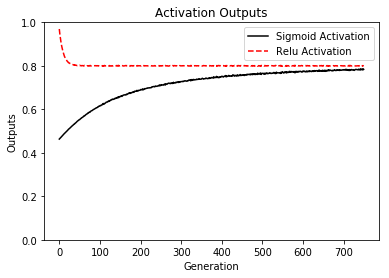

In [50]:
plt.plot(activation_sigmoid,'k-',label='Sigmoid Activation')
plt.plot(activation_relu,'r--',label='Relu Activation')
plt.ylim([0,1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()


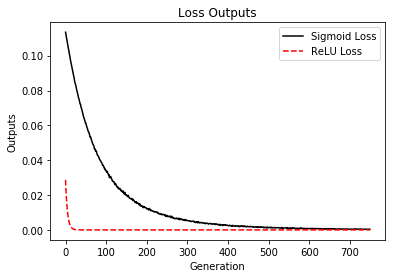

In [51]:
plt.plot(loss_vec_sigmoid,'k-',label = 'Sigmoid Loss')
plt.plot(loss_vec_relu,'r--',label='ReLU Loss')
plt.title('Loss Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

### Different Activation Functions
- Sigmoid: Less extreme outpus
- Sigmoid: Slower convergence
- ReLU: Converges quicker
- ReLU: Extreme output values possible